In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../')
print(os.getcwd())
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts.notebook_utils import notebookUtils
from sklearn.model_selection import train_test_split

#tensorflow stuff
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

/Users/rosscopeland/Desktop/personal/code/vivaldi/back_testing


In [2]:
nu = notebookUtils()
model_name = "strawmaker_plus"

In [3]:
dataset, features, indicators = nu.loadData(indicators=[('moh', 'time', ''), ('tod', 'time', ''), ('dow', 'time', ''), ('bop', 'close', ''),('optimal_v2', 'close', '')],
                            param_spec={},
                            optimal_threshold={'buy':(0.005, 0.03)},
                            spans=[{'indicator_name':'willr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [10,30]},
                                    {'indicator_name':'cci',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [10,30,60]},
                                    {'indicator_name':'rsi',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [2,3,5,10,30]},
                                    {'indicator_name':'natr',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [30,60,120,180]},
                                    {'indicator_name':'cmo',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [2,3,5,10,60]}
                                    ],
                            scale='minmaxwindow')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi

Loading data from LTC...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from OMG...
Loading data from chunk 0...
Loading data from ETH...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from chunk 5...
Loading data from ONT...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from BTC...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from chunk 5...
Loading data from NEO...
Loading data from chunk 0...
Loading data from chunk 1...
Loading data from chunk 2...
Loading data from chunk 3...
Loading data from chunk 4...
Loading data from DASH...
Loading data from chunk 0...
Loading data

In [4]:
edit_dataset = dataset.drop(["time", "open", "high", "low", "volume"], axis=1)
edit_dataset.dropna(inplace=True)
edit_dataset

,close,MOH,TOD,DOW,BOP,optimal,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_10,CCI_close_period_30,...,RSI_close_period_30,NATR_close_period_30,NATR_close_period_60,NATR_close_period_120,NATR_close_period_180,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
15179,207.490209,0,0,0,0.646018,0.0,0.446584,0.725456,3.322735e-01,0.564513,...,0.505445,0.296159,0.364127,0.462447,0.509292,0.085012,0.184165,0.321545,0.487719,0.399730
15180,207.475105,0,0,0,0.234177,0.0,0.438809,0.694989,4.788497e-01,0.585743,...,0.504003,0.294324,0.362502,0.461246,0.508427,0.078579,0.177685,0.315907,0.483846,0.398972
15181,207.037552,0,0,0,0.000000,0.0,0.217613,0.580940,2.970484e-01,0.542456,...,0.463663,0.294560,0.362628,0.461882,0.509509,0.014592,0.070211,0.192951,0.384834,0.377336
15182,206.993776,0,0,0,0.674419,0.0,0.226787,0.569609,3.075990e-01,0.524333,...,0.459781,0.288971,0.358819,0.459293,0.507588,0.012548,0.064361,0.183960,0.376215,0.375207
15183,206.896888,0,0,0,0.388889,1.0,0.179086,0.543353,3.493985e-01,0.515486,...,0.451082,0.282043,0.354241,0.456271,0.505387,0.007744,0.050407,0.162922,0.356530,0.370462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11372817,1.215165,1,0,0,1.000000,0.0,0.912126,0.971855,4.398984e-01,0.429937,...,0.698723,0.160933,0.207393,0.303133,0.393851,0.999998,0.999583,0.984961,0.865619,0.611787
11372818,1.188183,0,0,0,0.099130,0.0,0.557802,0.584209,3.301892e-12,0.100960,...,0.159362,0.401406,0.374320,0.427348,0.501630,0.012401,0.026547,0.052506,0.105005,0.217453
11372819,1.173741,0,0,0,0.398438,0.0,0.349519,0.364403,1.937302e-01,0.103156,...,0.068145,0.504169,0.448566,0.483934,0.551362,0.006028,0.014902,0.032090,0.065938,0.107594
11372820,1.168171,0,0,0,0.888889,0.0,0.269174,0.279614,2.923722e-01,0.162279,...,0.043216,0.540108,0.477211,0.506530,0.571321,0.004317,0.011885,0.027012,0.056306,0.074169


In [32]:
trainX, testX, trainy, testy = nu.splitData(edit_dataset, split_size=0.2, y_column_name="optimal", shuffle_data=False, balance_unbalanced_data=True, balance_info={'multiplier_val':8, 'superset_class_val':0, 'randomize_concat':True})
trainX

,close,MOH,TOD,DOW,BOP,WILLR_close_period_10,WILLR_close_period_30,CCI_close_period_10,CCI_close_period_30,CCI_close_period_60,...,RSI_close_period_30,NATR_close_period_30,NATR_close_period_60,NATR_close_period_120,NATR_close_period_180,CMO_close_period_2,CMO_close_period_3,CMO_close_period_5,CMO_close_period_10,CMO_close_period_60
0,0.030203,0,0,0,0.964286,0.692768,0.836070,0.751223,0.711149,0.652622,...,0.765346,0.211880,0.264305,0.391886,0.497077,0.947766,0.908292,0.865735,0.811637,0.758778
1,0.342495,0,0,0,0.136364,0.259834,0.196065,0.416314,0.419952,0.485904,...,0.471597,0.150825,0.222875,0.259382,0.238469,0.122790,0.218536,0.305258,0.375413,0.445729
2,164.357274,0,0,0,0.034091,0.740474,0.780656,0.575270,0.663650,0.640756,...,0.782659,0.159043,0.140269,0.139368,0.135465,0.394533,0.568055,0.710696,0.793471,0.723908
3,16.744531,0,0,1,0.327664,0.555382,0.288296,0.114603,0.283933,0.310876,...,0.362458,0.135923,0.185347,0.229738,0.210924,0.074288,0.133111,0.189762,0.248466,0.426047
4,837.929477,0,0,0,0.318584,0.707215,0.648379,0.568915,0.632312,0.550483,...,0.370567,0.182116,0.185874,0.215211,0.215062,0.357340,0.544881,0.650932,0.582639,0.337289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952006,0.288602,0,0,0,0.500000,0.007390,0.517880,0.412452,0.420900,0.584170,...,0.575265,0.078680,0.102788,0.144421,0.185007,0.009201,0.074748,0.240366,0.441620,0.535936
952007,2.026183,0,0,0,0.500000,0.636169,0.599224,0.467451,0.492194,0.362964,...,0.504378,0.194557,0.264503,0.322171,0.323751,0.101635,0.272633,0.422480,0.488946,0.492551
952008,18.287851,0,0,0,0.414894,0.850153,0.378639,0.523615,0.514744,0.490032,...,0.378774,0.140551,0.150087,0.156199,0.170745,0.886242,0.750058,0.616305,0.486508,0.373476
952009,0.529585,0,0,0,0.555556,0.140100,0.423133,0.294745,0.469445,0.491241,...,0.419368,0.267803,0.242557,0.297971,0.326621,0.056657,0.133446,0.265425,0.389011,0.417384


In [33]:
class_weights = nu.getWeights(trainy)
class_weights

{0: 0.5625, 1: 4.5}

In [34]:
#neural network
model = Sequential()

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

opt = Adam(lr=1e-3, decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
callbacks = []

#stop model from training when it starts to get bad
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                min_delta=0, 
                                patience=5, 
                                verbose=0, 
                                mode='auto', 
                                baseline=None, 
                                restore_best_weights=True)
callbacks.append(early_stop)


# # getting the model_version name for the model checkpoint callback
# # keep is_nn to false here so it doesn't save the model just yet
# version_number = nu.exportModel(model, model_name, False, indicators, features, proba_threshold=0.0, is_nn=False, save_model=False)

# #saving model when validation accuracy gets better
# checkpoint_call = tf.keras.callbacks.ModelCheckpoint(f'./v2/strategy/saved_models/{model_name}/{version_number}', 
#                                      monitor='val_accuracy', 
#                                      verbose=0, 
#                                      save_best_only=True,
#                                      save_weights_only=False, 
#                                      mode='auto', 
#                                      save_freq='epoch')
# callbacks.append(checkpoint_call)

# if not os.path.isdir(f'./v2/strategy/saved_models/{model_name}/{version_number}/logs'):
#     os.mkdir(f'./v2/strategy/saved_models/{model_name}/{version_number}/logs')
# tensorb = tf.keras.callbacks.TensorBoard(log_dir=f'./v2/strategy/saved_models/{model_name}/{version_number}/logs',
#                                  histogram_freq=0, 
#                                  write_graph=True, 
#                                  write_images=False,    
#                                  update_freq='epoch', 
#                                  profile_batch=2, 
#                                  embeddings_freq=0,    
#                                  embeddings_metadata=None)
# callbacks.append(tensorb)

In [36]:
model.fit(trainX.drop("close", axis=1).values, trainy.values, callbacks=callbacks, epochs=30, class_weight=class_weights, validation_data=(testX.drop('close', axis=1).values, testy.values))

Epoch 1/30
29751/29751 [==============================] - 105s 4ms/step - loss: 0.4204 - accuracy: 0.7124 - val_loss: 0.4477 - val_accuracy: 0.6966
Epoch 2/30
29751/29751 [==============================] - 105s 4ms/step - loss: 0.4011 - accuracy: 0.7238 - val_loss: 0.5244 - val_accuracy: 0.6711
Epoch 3/30
29751/29751 [==============================] - 110s 4ms/step - loss: 0.3977 - accuracy: 0.7261 - val_loss: 0.4603 - val_accuracy: 0.6838
Epoch 4/30
29751/29751 [==============================] - 105s 4ms/step - loss: 0.3953 - accuracy: 0.7270 - val_loss: 0.4394 - val_accuracy: 0.7178
Epoch 5/30
29751/29751 [==============================] - 104s 3ms/step - loss: 0.3939 - accuracy: 0.7289 - val_loss: 0.4450 - val_accuracy: 0.7269
Epoch 6/30
29751/29751 [==============================] - 105s 4ms/step - loss: 0.3930 - accuracy: 0.7300 - val_loss: 0.4485 - val_accuracy: 0.7199
Epoch 7/30
29751/29751 [==============================] - 97s 3ms/step - loss: 0.3923 - accuracy: 0.7311 - val_l

In [52]:
reduced_classified_data = nu.classifyPoints([model], testX, predict_proba=True, proba_thresh=[0.84], plot_optimal=False, optimal=testy, is_nn=True)

In [53]:
smaller_view_data = reduced_classified_data[205000:207000]
smaller_view_data.reset_index(inplace=True)

<Figure size 432x288 with 0 Axes>

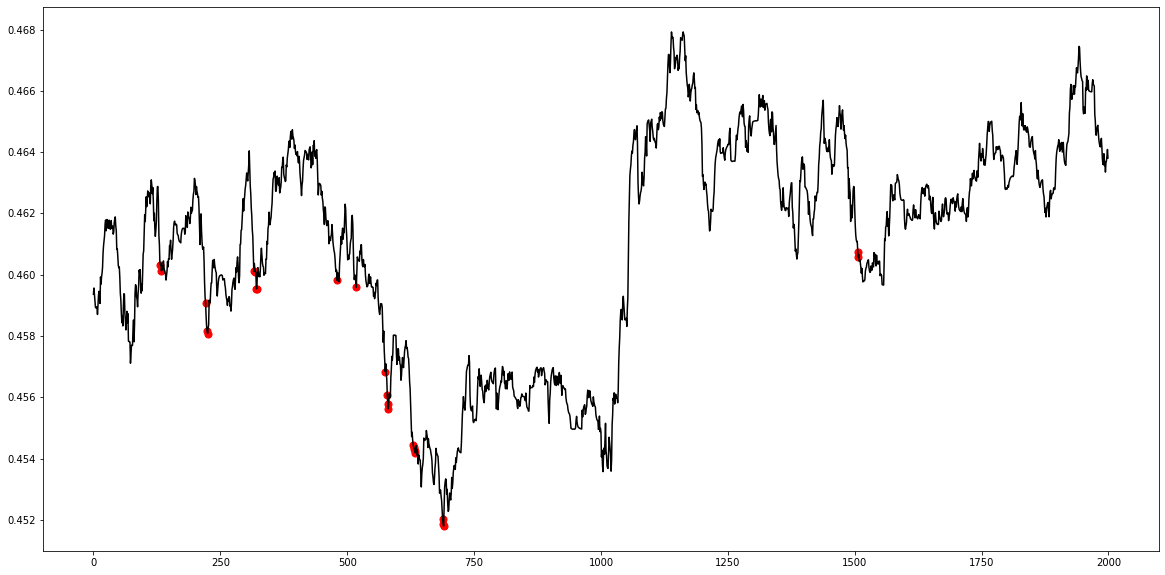

In [54]:
nu.graphPoints(smaller_view_data, mode="buy", plot_optimal=True)

In [55]:
model_version = nu.exportModel(model, model_name, new_version=False, indicators=indicators, features=features, proba_threshold=[0.825], is_nn=True)

INFO:tensorflow:Assets written to: ./v2/strategy/saved_models/strawmaker_plus/1_2/assets


In [26]:
# score, trades = nu.testModel(model_name, num_processes=4)

Importing Strategies...
Generating Model Data...
Preprocessing Model Predictions...
0it [00:00, ?it/s]Generating Algo Data...
Executing Strategy...
105553it [00:00, 142366.77it/s]
Generating Report...


TypeError: cannot unpack non-iterable NoneType object